# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Load Dataset

In [2]:
data = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')

# Convert Month to Datetime

In [4]:
data['Month'] = pd.date_range(start = '2000-01-01', periods = len(data), freq = 'M')
data.set_index('Month', inplace = True)

# Plot the Time Series

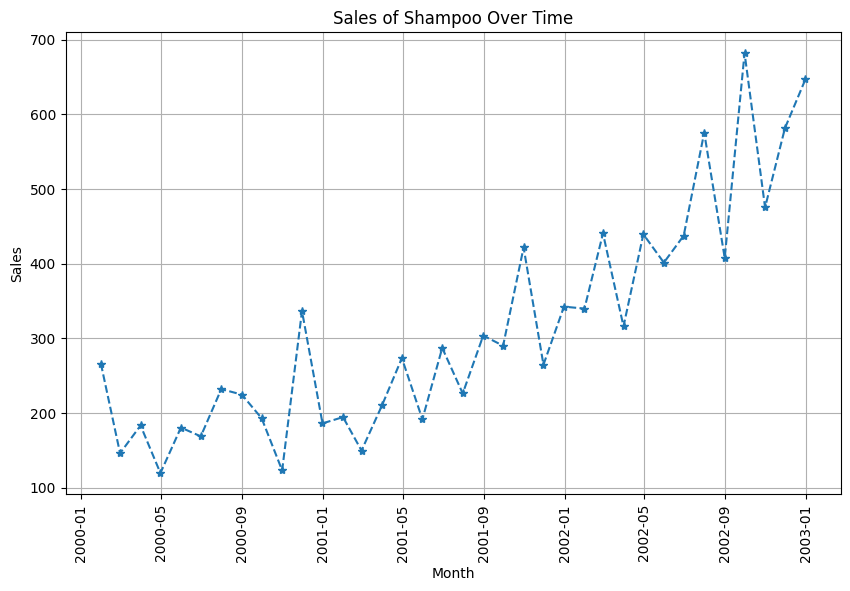

In [15]:
plt.figure(figsize = (10,6))
plt.plot(data.index, data['Sales of shampoo over a three year period'], marker = '*', linestyle = 'dashed')
plt.title('Sales of Shampoo Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

# Decomposition

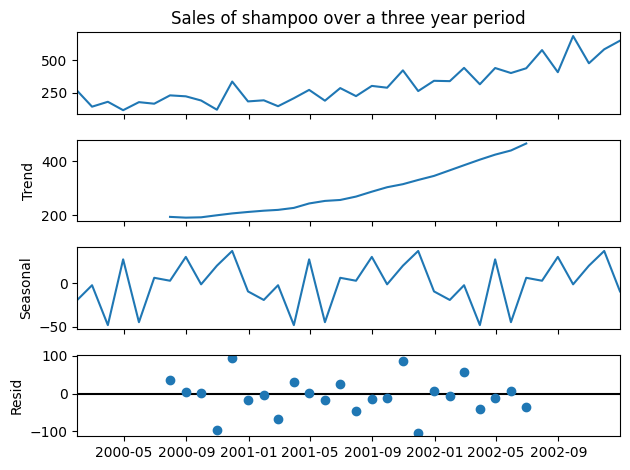

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Sales of shampoo over a three year period'], model = 'additive')

fig = decomposition.plot()
plt.show()

# Forecasting with ARIMA

In [17]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Sales of shampoo over a three year period'])
print('ADF Statistics', adf_test[0])
print('p-value: ', adf_test[1])

ADF Statistics 3.060142083641181
p-value:  1.0


# Fit an ARIMA Model

In [19]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Sales of shampoo over a three year period'], order = (1,1,1))
results = model.fit()

print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                           SARIMAX Results                                           
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                        ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                                       Wed, 13 Mar 2024   AIC                            406.782
Time:                                               03:33:58   BIC                            411.448
Sample:                                           01-31-2000   HQIC                           408.393
                                                - 12-31-2002                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003     

# Forecasting the Future Values

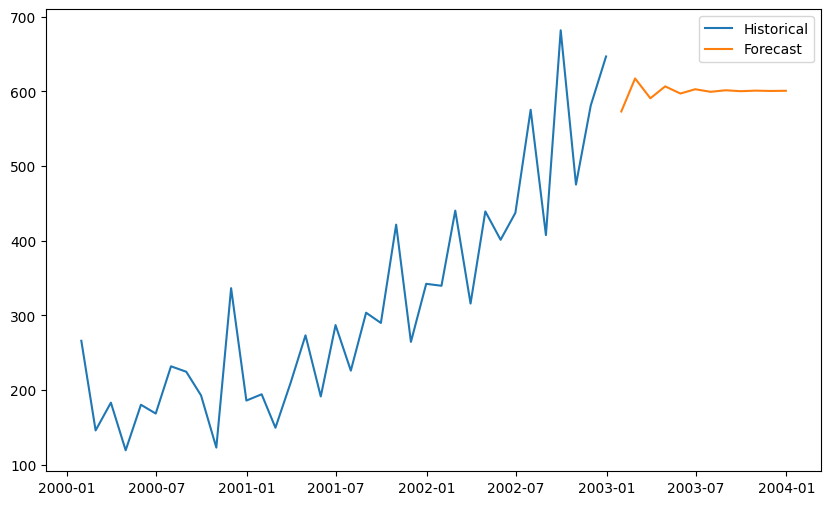

In [22]:
forecast = results.forecast(steps = 12)

plt.figure(figsize = (10,6))
plt.plot(data.index, data['Sales of shampoo over a three year period'], label = 'Historical')
plt.plot(forecast.index, forecast, label = 'Forecast')
plt.legend()
plt.show()